# Confusion matrix and AUC figures
Create the confusion matrix and AUC figures for existing results on the PRISMA dataset.

Test field to look for possible configurations and best looks for the figures in the paper revision.

In [25]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

In [26]:
sns.set(style='darkgrid', context='notebook', palette='turbo', font="serif")

In [27]:
# Load the results
directory = ""

## PRISMA
results_csv = pd.read_csv(f"{directory}/PRISMA_results_rovira/output_probabilities_lowlr.csv")
ypred_prisma = results_csv["prob"].values > 0.5
ytrue_prisma = results_csv["true_label"].values
print(ypred_prisma.shape)
print(ytrue_prisma.shape)

## SVM
results_csv_svm = pd.read_csv(f"{directory}/SVM_perm_results_rovira/output_probabilities.csv")
ypred_prisma_svm = results_csv_svm["prob"].values > 0.5
ytrue_prisma_svm = results_csv_svm["true_label"].values
ytrue_prisma_svm[ytrue_prisma_svm<0] = 0
print(ypred_prisma_svm.shape)
print(ytrue_prisma_svm.shape)

## RF
results_csv_rf = pd.read_csv(f"{directory}/RF_perm_results_rovira/output_probabilities.csv")
ypred_prisma_rf = results_csv_rf["prob"].values > 0.5
ytrue_prisma_rf = results_csv_rf["true_label"].values
ytrue_prisma_rf[ytrue_prisma_rf<0] = 0
print(ypred_prisma_rf.shape)
print(ytrue_prisma_rf.shape)


(124,)
(124,)
(124,)
(124,)
(124,)
(124,)


/tmp/ipykernel_2756878/1811200041.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


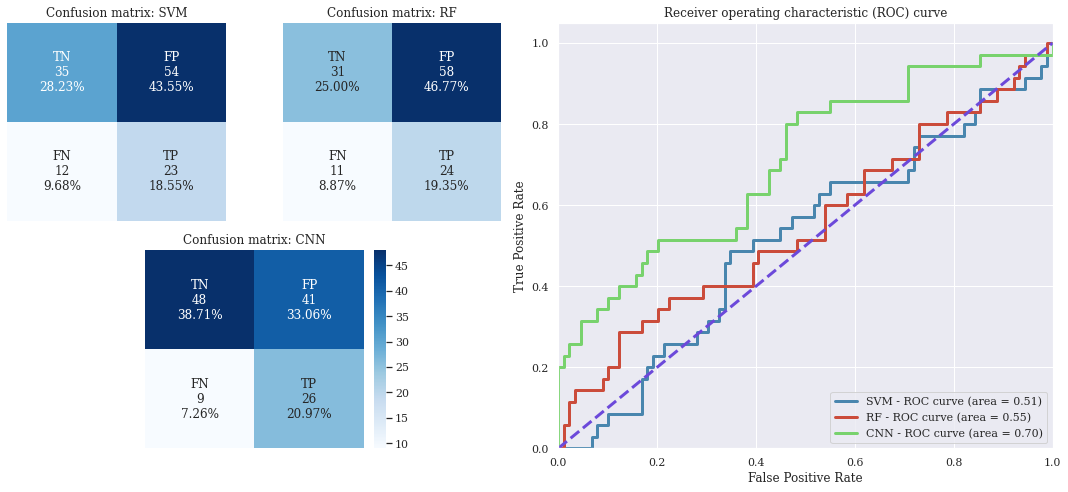

In [28]:
# Create axes and figure
fig = plt.figure(figsize=(15, 7))
gs = gridspec.GridSpec(4, 8)
group_names = ["TN","FP","FN","TP"]
ax1 = plt.subplot(gs[:2, :2])
cf_matrix = confusion_matrix(ytrue_prisma_svm, ypred_prisma_svm)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, xticklabels=False, yticklabels=False, ax=ax1)
ax1.tick_params(left=False, bottom=False)
ax1.set_title("Confusion matrix: SVM")


## Confusion matrix RF
ax2 = plt.subplot(gs[:2, 2:4])
cf_matrix = confusion_matrix(ytrue_prisma_rf, ypred_prisma_rf)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, xticklabels=False, yticklabels=False, ax=ax2)
ax2.tick_params(left=False, bottom=False)
ax2.set_title("Confusion matrix: RF")

## Confusion matrix CNN
ax3 = plt.subplot(gs[2:4, 1:3])
cf_matrix = confusion_matrix(ytrue_prisma, ypred_prisma)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# insert axis for the colorbar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cax = inset_axes(ax3,
                 width="5%",  # width: 40% of parent_bbox width
                 height="100%",  # height: 10% of parent_bbox height
                 loc='right',
                 bbox_to_anchor=(0, 0, 1.1, 1),
                 bbox_transform=ax3.transAxes,
                 borderpad=0,
                 )

sns.heatmap(cf_matrix, annot=labels, cbar_ax=cax, fmt='', cmap='Blues', cbar_kws = {"orientation": "vertical"}, xticklabels=False, yticklabels=False, ax=ax3)
ax3.tick_params(left=False, bottom=False)
ax3.set_title("Confusion matrix: CNN")

## AUC of the three
ax4 = plt.subplot(gs[:, 4:])
lw = 3

fpr, tpr, _ = roc_curve(ytrue_prisma_svm, results_csv_svm["prob"].values)
roc_auc_svm = auc(fpr, tpr)
ax4.plot(
    fpr,
    tpr,
    color="#4986ae",
    lw=lw,
    label="SVM - ROC curve (area = %0.2f)" % roc_auc_svm,
)

fpr, tpr, _ = roc_curve(ytrue_prisma_rf, results_csv_rf["prob"].values)
roc_auc_rf = auc(fpr, tpr)
ax4.plot(
    fpr,
    tpr,
    color="#cb4c3b",
    lw=lw,
    label="RF - ROC curve (area = %0.2f)" % roc_auc_rf,
)

fpr, tpr, _ = roc_curve(ytrue_prisma, results_csv["prob"].values)
roc_auc_cnn = auc(fpr, tpr)

ax4.plot(
    fpr,
    tpr,
    color="#78d26d",
    lw=lw,
    label="CNN - ROC curve (area = %0.2f)" % roc_auc_cnn,
)
ax4.plot([0, 1], [0, 1], color="#6c49da", lw=lw, linestyle="--")
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel("False Positive Rate")
ax4.set_ylabel("True Positive Rate")
ax4.set_title("Receiver operating characteristic (ROC) curve")
ax4.legend(loc="lower right")

plt.tight_layout()
plt.savefig('/home/extop/GERARD/PAPERS/PAPER_ON/Second_submission/roc.eps', dpi=300)

In [29]:
## Calcular valors 
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score
def print_results(y_te, predictions):
    """
    Function that calculates relevant performance values for evaluation
    """
    tn, fp, fn, tp = confusion_matrix(y_te, predictions).ravel()

    acc = accuracy_score(y_te, predictions)
    bal_acc =balanced_accuracy_score(y_te, predictions)
    spec = tn / (tn + fp)
    sens = tp / (tp + fn)
    precision = precision_score(y_te, predictions)
    recall = recall_score(y_te, predictions)

    print(f'Accuracy: {acc}')
    print(f'Bal. Accuracy: {bal_acc}')
    print(f'Specificity: {spec}')
    print(f'Sensitivity: {sens}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')


print('SVM')
print_results(ytrue_prisma_svm, ypred_prisma_svm)
print('RF')
print_results(ytrue_prisma_rf, ypred_prisma_rf)
print('CNN')
print_results(ytrue_prisma, ypred_prisma)

SVM
Accuracy: 0.46774193548387094
Bal. Accuracy: 0.5252006420545746
Specificity: 0.39325842696629215
Sensitivity: 0.6571428571428571
Precision: 0.2987012987012987
Recall: 0.6571428571428571
RF
Accuracy: 0.4435483870967742
Bal. Accuracy: 0.5170144462279294
Specificity: 0.34831460674157305
Sensitivity: 0.6857142857142857
Precision: 0.2926829268292683
Recall: 0.6857142857142857
CNN
Accuracy: 0.5967741935483871
Bal. Accuracy: 0.641091492776886
Specificity: 0.5393258426966292
Sensitivity: 0.7428571428571429
Precision: 0.3880597014925373
Recall: 0.7428571428571429


In [30]:
"""
# Extract list of FP from results CNN
# Do it here to not create extra 

## PRISMA
results_csv = pd.read_csv(f"{directory}/PRISMA_results/output_probabilities_lowlr.csv")
ypred_prisma = results_csv["prob"].values > 0.5
ytrue_prisma = results_csv["true_label"].values

# Get information about false negatives 
# get indexs
fp_indexs = (~ypred_prisma) & (ytrue_prisma == 1)
index_list = [i for i, x in enumerate(fp_indexs) if x]
print(index_list)
print(results_csv.columns)
list_of_values = results_csv.loc[index_list].id.values

print(list_of_values)
print(len(list_of_values))

# divide into two lists
list_of_ids = [int(x.split('_')[0]) for x in list_of_values]
list_of_side = [x.split('_')[1] for x in list_of_values]

df_to_save = pd.DataFrame({
    "SAP": list_of_ids, 
    "Eye" : list_of_side
})

# load the csv with information and save a subset with the information of the subjects
# note that some of them are repeated

csv_info_path = '/mnt/Bessel/Gproj/Gerard_DATA/sap_labels_add2.csv'
df_info_path = pd.read_csv(csv_info_path)
df_info_path.columns

df_to_save = df_to_save.merge(df_info_path, how="left", on="SAP")
df_to_save.to_csv("FN_SAPs_to_review.csv", index=False)
"""

'\n# Extract list of FP from results CNN\n# Do it here to not create extra \n\n## PRISMA\nresults_csv = pd.read_csv(f"{directory}/PRISMA_results/output_probabilities_lowlr.csv")\nypred_prisma = results_csv["prob"].values > 0.5\nytrue_prisma = results_csv["true_label"].values\n\n# Get information about false negatives \n# get indexs\nfp_indexs = (~ypred_prisma) & (ytrue_prisma == 1)\nindex_list = [i for i, x in enumerate(fp_indexs) if x]\nprint(index_list)\nprint(results_csv.columns)\nlist_of_values = results_csv.loc[index_list].id.values\n\nprint(list_of_values)\nprint(len(list_of_values))\n\n# divide into two lists\nlist_of_ids = [int(x.split(\'_\')[0]) for x in list_of_values]\nlist_of_side = [x.split(\'_\')[1] for x in list_of_values]\n\ndf_to_save = pd.DataFrame({\n    "SAP": list_of_ids, \n    "Eye" : list_of_side\n})\n\n# load the csv with information and save a subset with the information of the subjects\n# note that some of them are repeated\n\ncsv_info_path = \'/mnt/Bessel/Gpr